# Homework1 - Haim Vieder

In this Prpject, I was asked to Develop a predictive model based on the provided Order and Online customer behavior data.
My results are in the summary section.

In [528]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,10]

## Exploration and understanding of the data sets

In [695]:
'''
I read the provided Order and Online customer behavior data and convert time columns to Pandas time. 
'''

order1 = pd.read_csv('C:/Users/jacob/order1.csv' )
online1 = pd.read_csv('C:/Users/jacob/online1.csv')

def time_format(time1):
    try:
        return pd.to_datetime(time1,format = '%m/%d/%Y %/H:%M:%S ')
    except:
        return pd.to_datetime(time1,format = '%m/%d/%Y %H:%M')
    
order1['orderdate'] = order1['orderdate'].apply(time_format)  
online1['dt'] = online1['dt'].apply(time_format)  

In [1023]:
online1.describe()

,session,visitor,custno,category,event1,event2
count,9.547740e+05,954774.000000,954774.000000,954774.000000,164928.000000,954774.000000
mean,1.893075e+06,246963.121538,37011.541473,2.684933,4.501576,5.666678
std,1.086779e+06,145929.540403,21559.691539,0.571617,3.494639,2.368242
min,2.000000e+00,1.000000,6.000000,1.000000,1.000000,1.000000
25%,9.554362e+05,125528.250000,17985.000000,2.000000,1.000000,4.000000
50%,1.903075e+06,252901.000000,38040.000000,3.000000,4.000000,7.000000
75%,2.845886e+06,377563.000000,56516.000000,3.000000,7.000000,7.000000
max,3.750761e+06,505850.000000,71427.000000,3.000000,11.000000,10.000000


Main points:
We can understand that we have in this data 954774. observations
(but only 164928 events1)

In [1022]:
order1.describe()

,custno,ordno,prodcat2,prodcat1,revenue,Month,hour
count,263278.000000,263278.000000,261455.000000,263278.000000,263278.000000,263278.000000,263278.000000
mean,19244.733855,64173.395620,37.384330,2.920924,74.939302,6.289276,13.876423
std,19414.103037,43064.595961,44.639098,1.696565,43.277175,3.451985,5.159523
min,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
25%,3438.000000,26505.000000,5.000000,2.000000,37.430000,3.000000,10.000000
50%,11389.500000,59040.500000,16.000000,2.000000,74.930000,6.000000,14.000000
75%,31459.000000,98340.750000,58.000000,4.000000,112.280000,9.000000,18.000000
max,71427.000000,154405.000000,263.000000,7.000000,150.000000,12.000000,23.000000


Main points:
We can understand that we have 263278 observations. 
and the mean revenue is 75 but with high standard deviation: 43

In [608]:
round(full_data.isnull().sum()/len(full_data) ,2) 

custno       0.00
ordno        0.00
orderdate    0.00
prodcat2     0.00
prodcat1     0.00
revenue      0.00
Month        0.00
hour         0.00
date         0.00
time_x       0.00
session      0.00
visitor      0.00
dt           0.00
category     0.00
event1       0.85
event2       0.00
time_y       0.00
abc          0.00
dtype: float64

We find only one feature with missing data.
83% missing data for feature is very high
At first thought, I wanted remove it, but on second thought
I want to check this variable.
Maybe it can improve my model although the missing data in this column. 

Now I merge the data, when we need to remember the fact the order must be made after connection.

In [758]:
#online1 data 
online1['date'] = online1['dt'].dt.date
online1['time'] = online1['dt'].dt.time

#order1 data
order1['Month'] = order1['orderdate'].dt.month
order1['hour'] = order1['orderdate'].dt.hour
order1['date'] = order1['orderdate'].dt.date
order1['time'] = order1['orderdate'].dt.time

full_data = pd.merge(order1,online1, left_on = ['date','custno'], right_on = ['date','custno'] , how = 'left')

full_data = full_data.reset_index(drop = True)
full_data = full_data[full_data['time_x'] > full_data['time_y'] ]
full_data.sort_values(by=['custno','orderdate','prodcat2'],inplace = True)
    

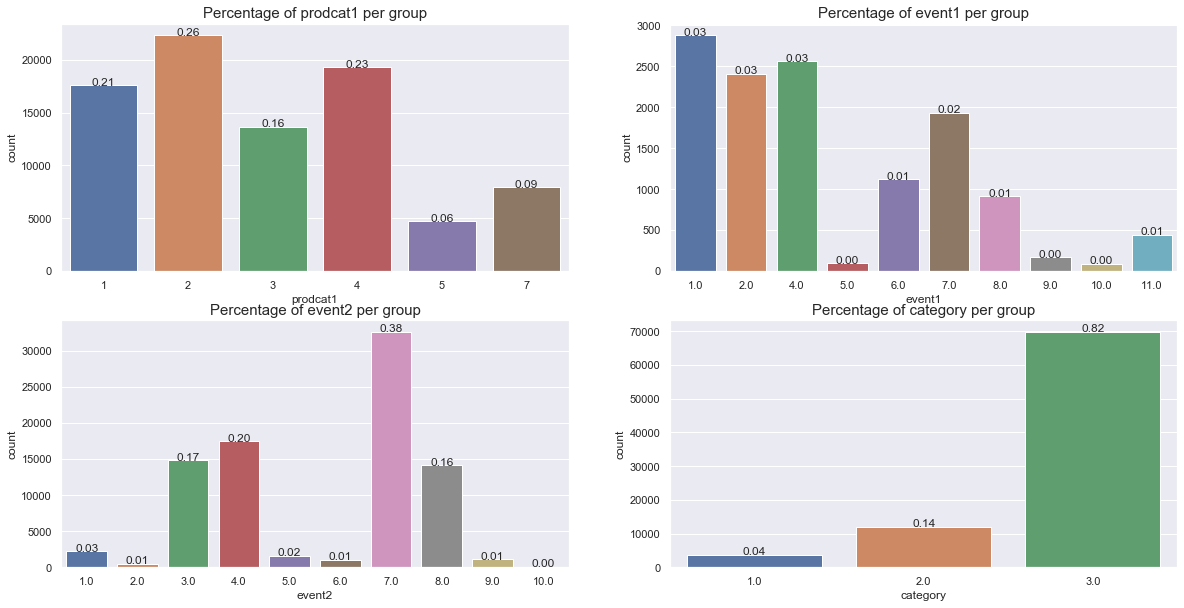

In [687]:
plt.show()
def show_graph(data_re,col,number_of_graph):
    total = float(len(data_re))
    g = sns.countplot(data_re[col],ax=number_of_graph)
    g.set_title('Percentage of ' + col + ' per group',fontsize = 15)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 1,
                '{:1.2f}'.format(height/total),
                ha="center")

fig, ((first,second),(third,forth)) = plt.subplots(2,2,figsize=(20,10))        
                
show_graph(full_data,'prodcat1',first)
show_graph(full_data,'event1',second)
show_graph(full_data,'event2',third)
show_graph(full_data,'category',forth)


From these plots, we can find more basic statistics:
<br>largest group of label is prodcat1 = 2.
<br>event1 - largest group is event1 = 1 (5%) , after that, event1 = (2 or 4)
<br>event2 - the largest group is event2 = 7 with 43% 
<br>Most of the purchase made by category = 3. (Almost 80%)





If customer wants to purchase item, s/he has session number belongs to their connection to the website.
I saw a lot of examples of purchases without documentation of session number (before the purchase).
<br>In addition, we know that every session is limited (in terms of mintues for each connection).  
The merging has been done by date and custno columns.
I took the maximum time of session, before the order.

# Feature engineering

In this section I'll explain and apply new features for building the model. <br> 
It's not enougth to get the maximum time of session before the order, because we can find sessions sign in few hours
before the order.
First, we take only the max most close sign in before the order.
Second, I wanted check how each label behaves against  'gap_dates' (Number of mintues from closeest log in to order)

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


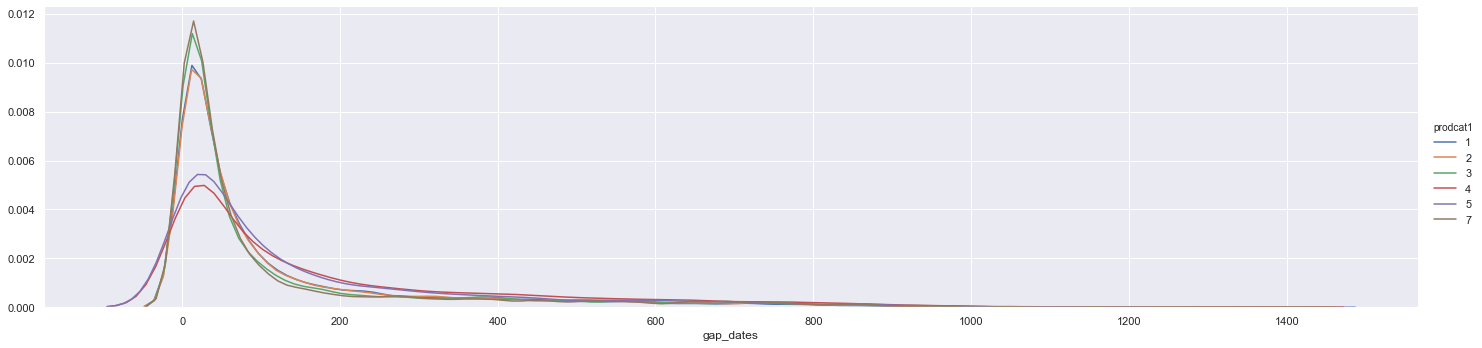

In [890]:
'''
In our context it's make sense to purchase immediately after log in.
It's the reason why I defined (and remove) outliers  only in the positive side.
'''

full_data['gap_dates'] = (full_data['orderdate'] - full_data['dt']).dt.total_seconds()/60
full_data = full_data.loc[full_data.groupby(['ordno'])['gap_dates'].idxmax()]

facet = sns.FacetGrid(full_data, hue="prodcat1",aspect=4,size=5)
facet.map(sns.kdeplot,'gap_dates',shade= False)
facet.add_legend()

Q1 =  full_data['gap_dates'].quantile(0.25)
Q3 = full_data['gap_dates'].quantile(0.75)
IQR = Q3 - Q1

#remove outliers belongs positive side.
full_data12 = full_data[(full_data['gap_dates'] < Q3+1.5*IQR)]

full_data12['gap_dates'] = np.log((1+ full_data12['gap_dates']))

full_data12.sort_values(by=['custno','orderdate'],inplace = True)


Since this Distribution is highly skewed, we can apply log transformation in order to decrease the data SKewness. <br> 
After that, we get:

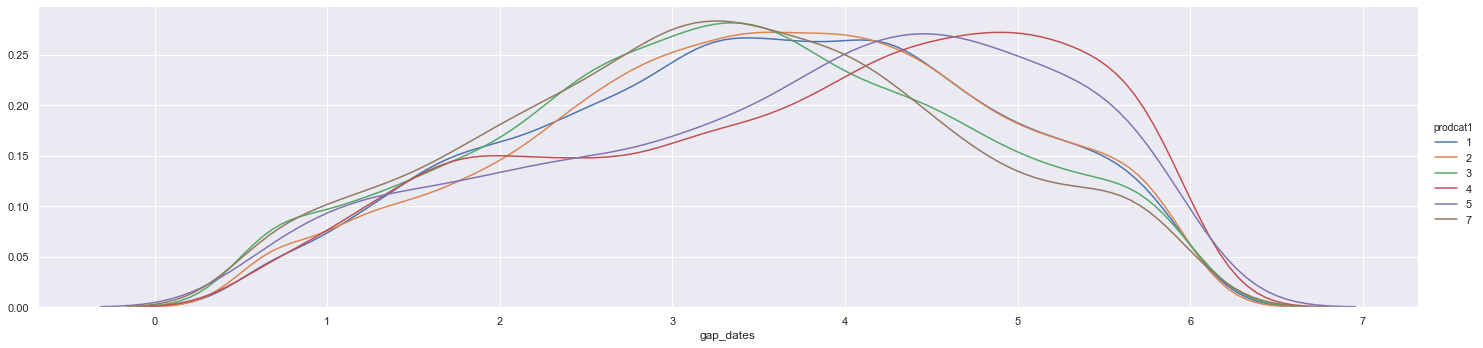

In [423]:
facet = sns.FacetGrid(full_data12, hue="prodcat1",aspect=4,size=5)
facet.map(sns.kdeplot,'gap_dates',shade= False)
facet.add_legend()

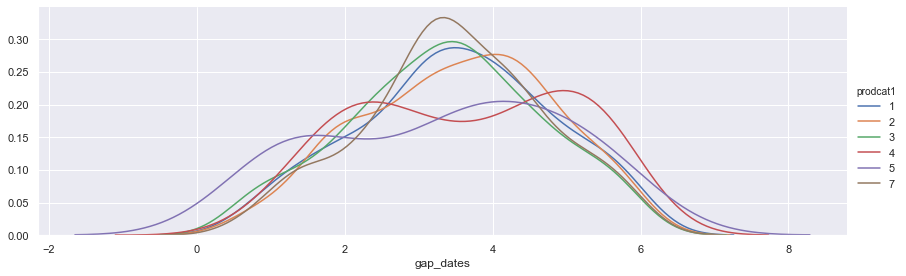

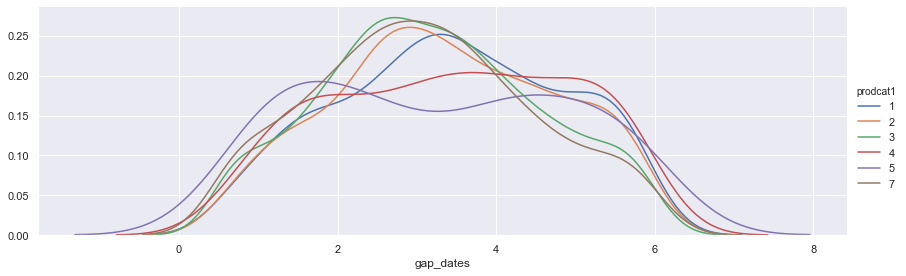

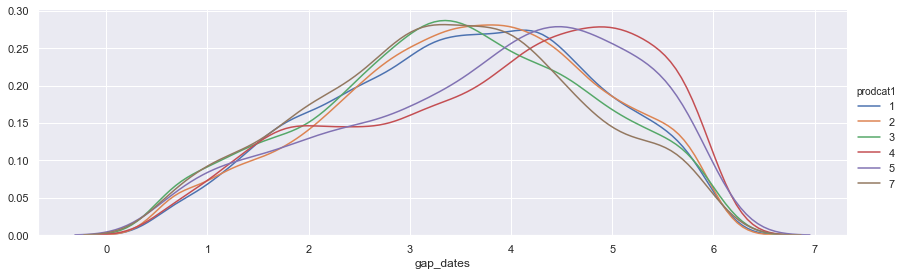

In [447]:
def density_of_gap_dates(data1234,i):
    facet = sns.FacetGrid(data1234[data1234['category'] == i] , hue="prodcat1",aspect=3,size=4)
    facet.map(sns.kdeplot,'gap_dates',shade= False)
    #facet.set_title()
    facet.add_legend()

for i in pd.Series(full_data12['category'].unique()).sort_values():  
    density_of_gap_dates(full_data12,i)


In these graphs I we can find the gap between the gap_dates among the categories.
In the first category we can't find clearly difference between the products.
In the second category we can find that products 4 and 5 behave diffrent from others, but it's not so clear.
In the third graph, we can find that products 4 and 5 behave diffrent from others and it's really clear.

In [891]:
full_data12['count_obs'] = full_data12.groupby(['custno']).cumcount()

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Count observations per each purchase')

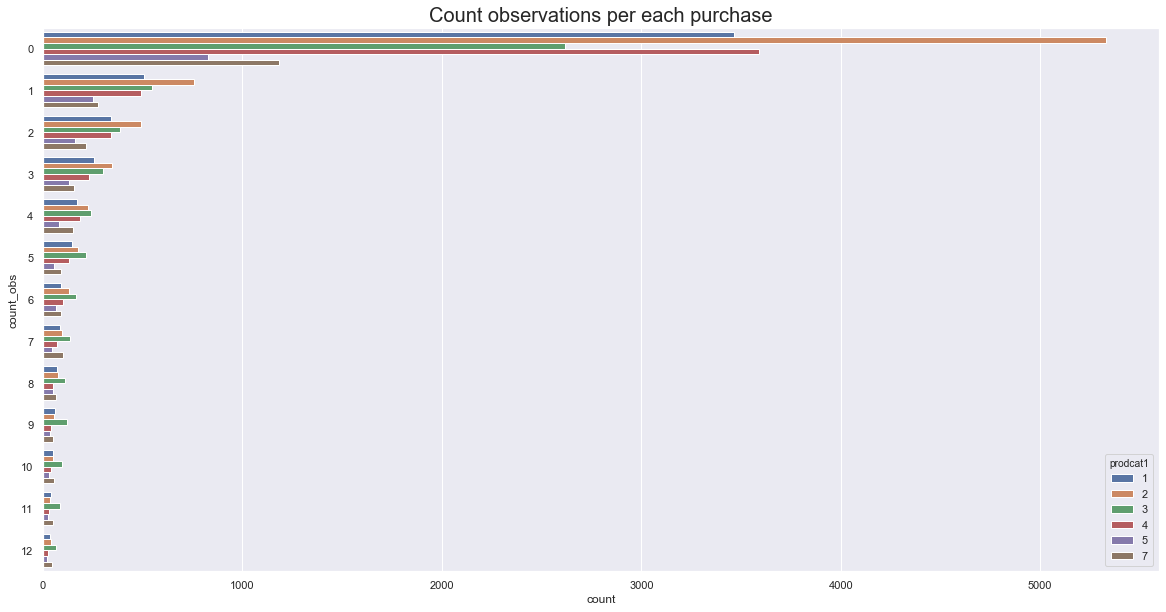

In [722]:
ax = sns.countplot(y = 'count_obs', hue = 'prodcat1' , data = full_data12,
                  order=full_data12.count_obs.value_counts().iloc[:13].index)
ax.set_title('Count observations per each purchase',fontsize = 20)

This plot shows intresting pattern:
If the purchase is the first purchase (for each customer), the pattern is similar to the whole the data
From the second purchase ,we can find the increasing product number 3 comparing with the other products

C:\Users\jacob\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jacob\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


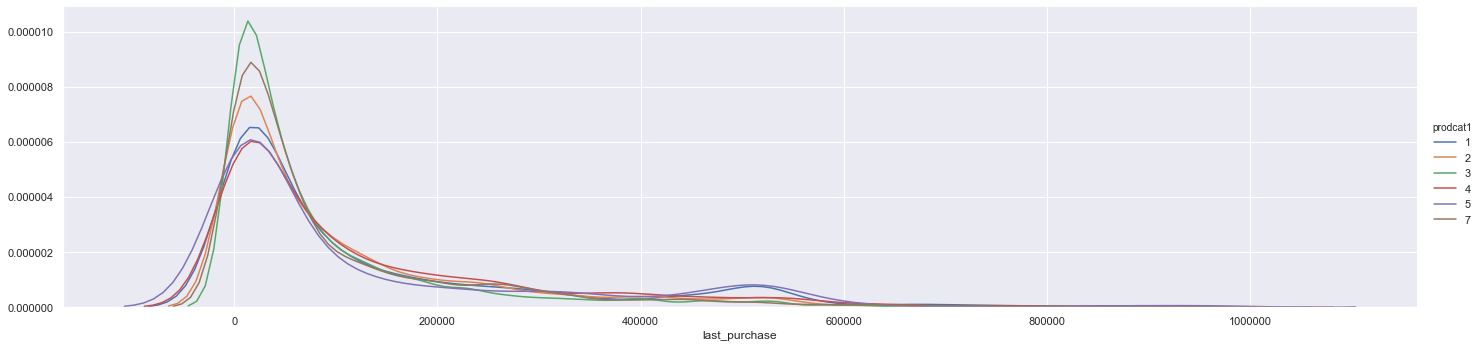

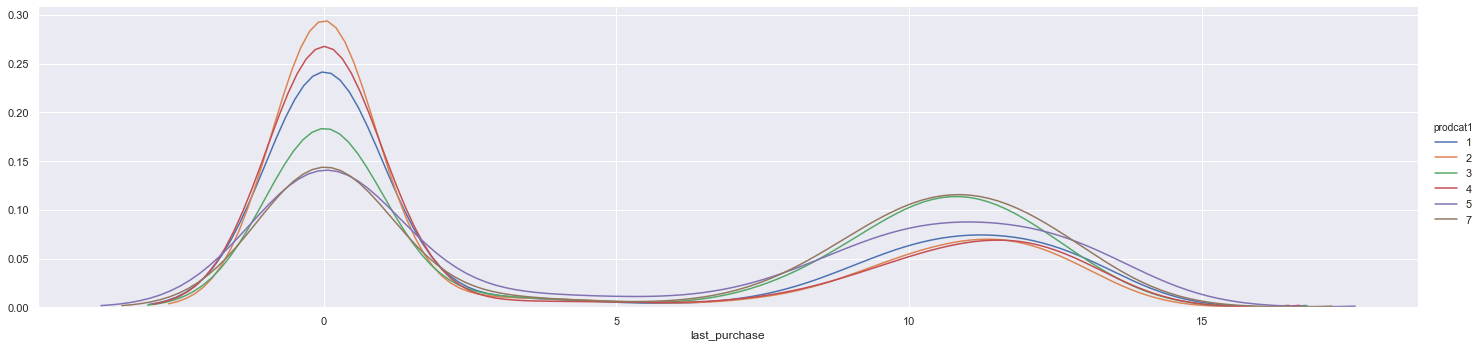

In [1013]:
full_data12['abc'] = full_data12.groupby(['custno'])['orderdate'].shift()
full_data12['last_purchase'] =   (full_data12['orderdate'] - full_data12['abc']).dt.total_seconds()/60

facet = sns.FacetGrid(full_data12, hue="prodcat1",aspect=4,size=5)
facet.map(sns.kdeplot,'last_purchase',shade= False)
facet.add_legend()

full_data12['last_purchase'] = np.log((full_data12['last_purchase']))

full_data12['last_purchase'].fillna(0,inplace=True)
full_data12 = full_data12.replace([np.inf, -np.inf],0)

facet = sns.FacetGrid(full_data12, hue="prodcat1",aspect=4,size=5)
facet.map(sns.kdeplot,'last_purchase',shade= False)
facet.add_legend()


This feature is highly skewed,I can apply log transformation in order to decrease the data SKewness.
We can find that the distbutions aren't so diffrent between the prodacts
Even though, if we can try to grouped the products by the shape of the distributions: 
The groups are: (product 1+ product 5) , (product 2+ product 4), (product 3 + product 7)

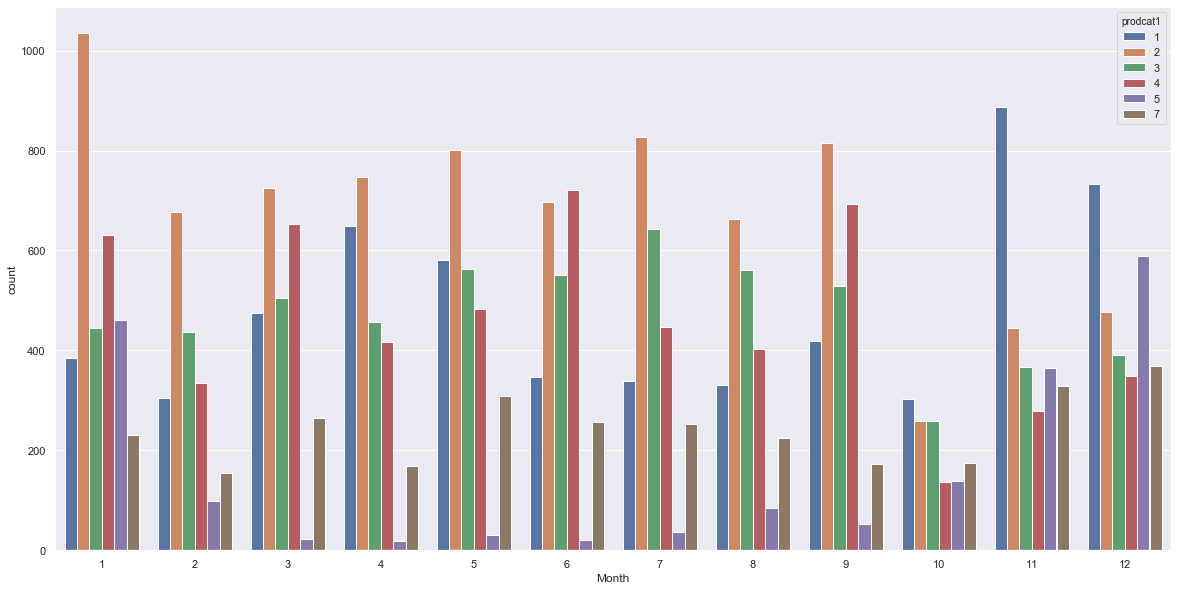

In [251]:
ax = sns.countplot(x = 'Month', hue = 'prodcat1' , data = full_data12)

In [883]:
f2 = np.array([4,6,1])
f3 = np.array([10,11,12])

In [403]:
''''
Here I chose to show thw result by matrix.
We can find here for each month the most popular product
We can see the change at the last year (The increasing for buying product number 1 and number 7)
'''

result = pd.crosstab(index=full_data['Month'], 
                     columns=full_data['prodcat1'], 
                     values=full_data['prodcat1'], 
                     aggfunc='count' ,
                    normalize='index')#.applymap('{:.2f}%'.format)

def highlight_max(rows,axis =False):
    '''
    Two_largest values in a row are yellow.
    '''
    two_largest = rows.nlargest(2).values
    return ['background-color: yellow' if v in two_largest  else '' for v in rows]

result.style.apply(highlight_max,axis=1)

prodcat1,1,2,3,4,5,7
Month,,,,,,
1,0.115106,0.325251,0.136288,0.208194,0.145206,0.0699554
2,0.149021,0.33363,0.215747,0.176157,0.0484875,0.0769573
3,0.176569,0.266689,0.192924,0.258344,0.00834446,0.0971295
4,0.265699,0.298004,0.185118,0.177858,0.0076225,0.0656987
5,0.207431,0.284976,0.201616,0.182876,0.0106624,0.112439
6,0.126102,0.265763,0.210508,0.290847,0.00915254,0.0976271
7,0.127565,0.328317,0.247264,0.188098,0.0140219,0.0947332
8,0.139294,0.292018,0.245971,0.186109,0.034152,0.102456
9,0.148062,0.297118,0.194435,0.272938,0.0208678,0.0665783


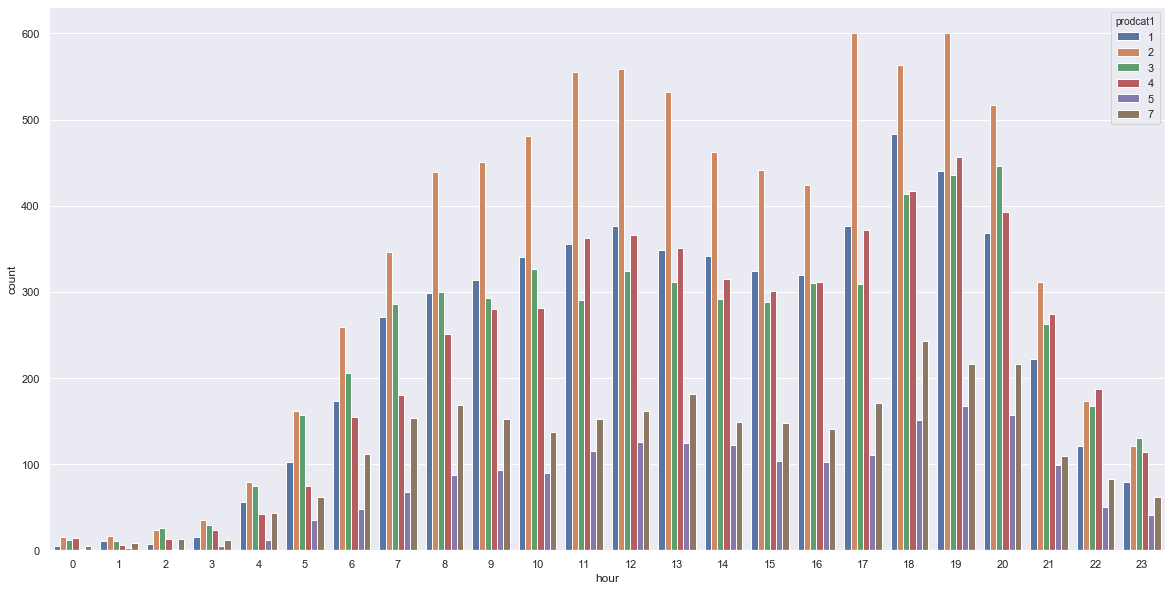

In [256]:
ax = sns.countplot(x = 'hour', hue = 'prodcat1' , data = full_data12)

We can find here the changing in the characteristics of sales products
Until 20:00 , There is no change throughout the day- most popular product is product 2 etc.
Later, its's (of product number 2) sales are decreasing relative to others 

In [893]:
f4 = np.arange(20)

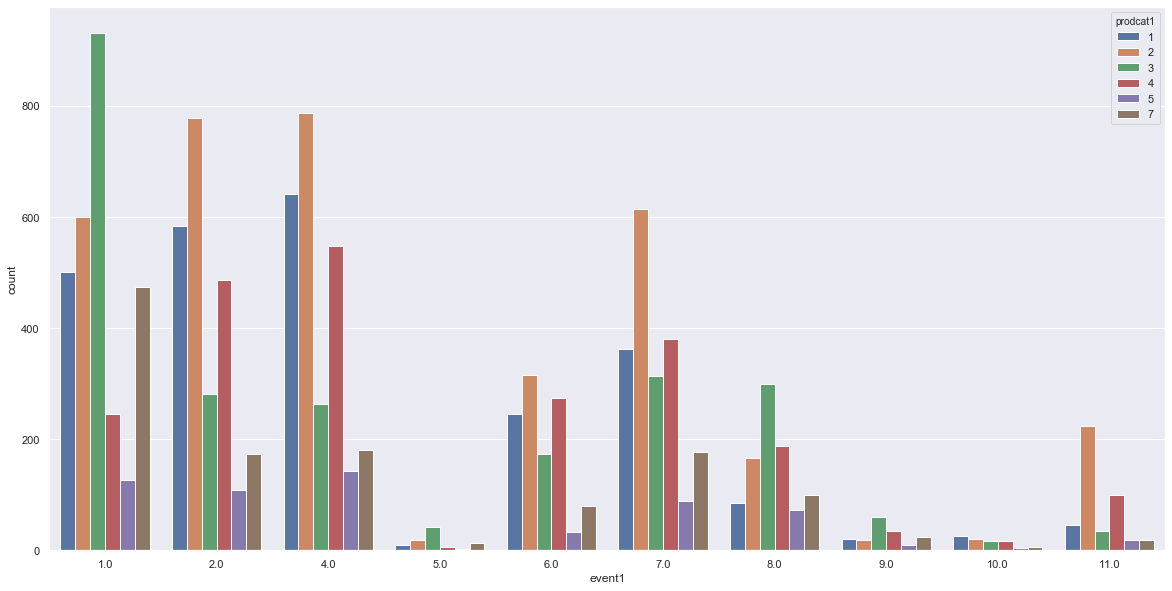

In [23]:
ax = sns.countplot(x = 'event1', hue = 'prodcat1' , data = full_data)

We have here two groups of patterns. The first be f0(event 1 most occurrence before purchase product number2 etc).
the second group includes all the rest(event 1 most occurrence before purchase product number3 etc.)



In [1012]:
f0 = np.array([2.0,4.0,6.0,7.0,11.0])

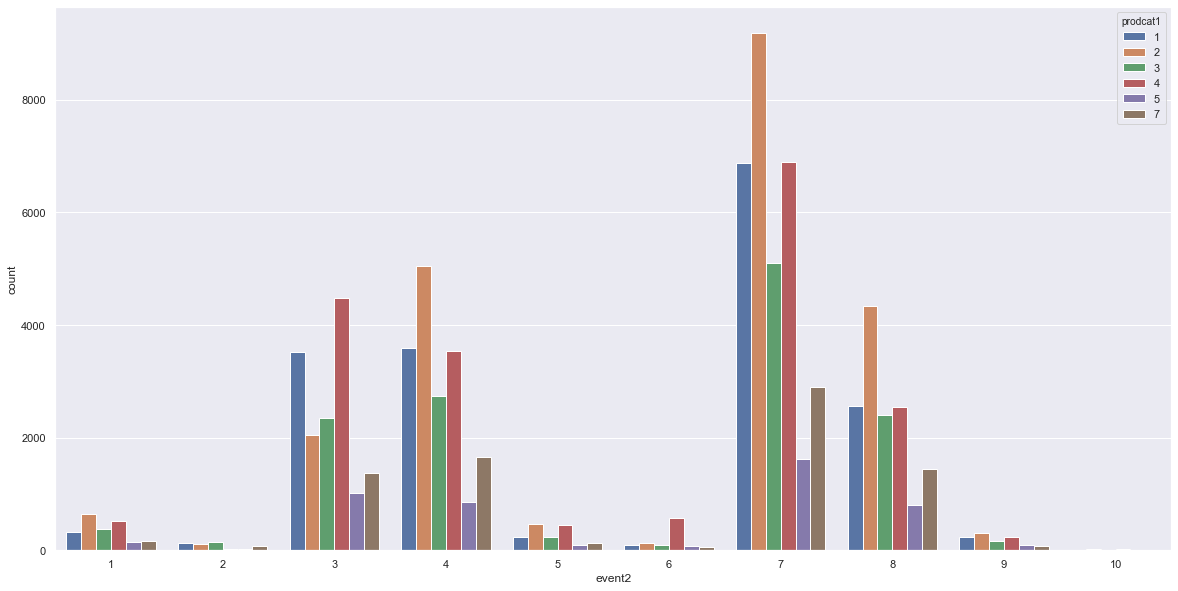

In [24]:
ax = sns.countplot(x = 'event2', hue = 'prodcat1' , data = full_data)

In [759]:
f1 = np.array([1,2,4,7,8,10])

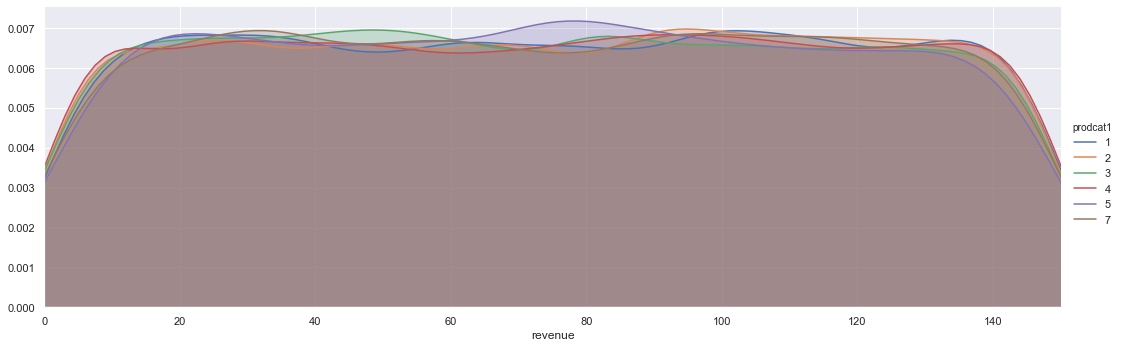

In [29]:
facet = sns.FacetGrid(full_data,hue = 'prodcat1' , aspect=3 ,size = 5)
facet.map(sns.kdeplot,'revenue',shade = True)
facet.set(xlim=(0,full_data['revenue'].max()))
facet.add_legend()

In [ ]:
@calssification - in test and train the same percentage of labels in every set!!!!

In [894]:
full_data12['category_bin1'] = np.where(full_data12['category'] == 1, full_data12['gap_dates'] , 0)            
full_data12['category_bin2'] = np.where(full_data12['category'] == 2, full_data12['gap_dates'] , 0)     
full_data12['category_bin3'] = np.where(full_data12['category'] == 3, full_data12['gap_dates'] , 0)     

full_data12['hour'] = np.where(full_data12['hour'].isin(f4) , 1 , 0)

full_data12['Month'] = np.where(full_data12['Month'].isin(f2) , 1 , np.where(full_data12['Month'].isin(f3),2,3)) 

full_data12['hour_Month'] = full_data12['hour'] * full_data12['Month']

full_data12['count_obs'] = np.where(full_data12['count_obs'] == 0 , 1 , 0)

full_data12['event2'] = np.where(full_data12['event2'].isin(f1) , 1 , 0)

full_data12['event1'] = np.where(np.isnan(full_data12['event1']) , 99 , full_data12['event1'])
full_data12['event1_he'] = np.where(full_data12['event1'] == 99 , 1 , 0)


# Feature selection

In [ ]:
In this section I make Feature selection by chi2 test, in order to get the most importance predictors.
This method is suitable for our features - categorial features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = full_data12[['Month', 'hour','hour_Month','category_bin1','category_bin2','category_bin3','event2','last_purchase'
                ,'count_obs','event1','event1_he']]
y = full_data12['prodcat1']


In [895]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [899]:
select_feature = SelectKBest(chi2, k=5).fit(X,y)

In [901]:
print('Score:', select_feature.scores_)
print('Feature:', X.columns)

Score: [ 112.79244485   12.40525567  129.72598855  615.89893996 4040.81466699
 2408.27084019  145.59788759 6469.00919906  491.93721314 1772.62857609
   18.71588603]
Feature: Index(['Month', 'hour', 'hour_Month', 'category_bin1', 'category_bin2',
       'category_bin3', 'event2', 'last_purchase', 'count_obs', 'event1',
       'event1_he'],
      dtype='object')


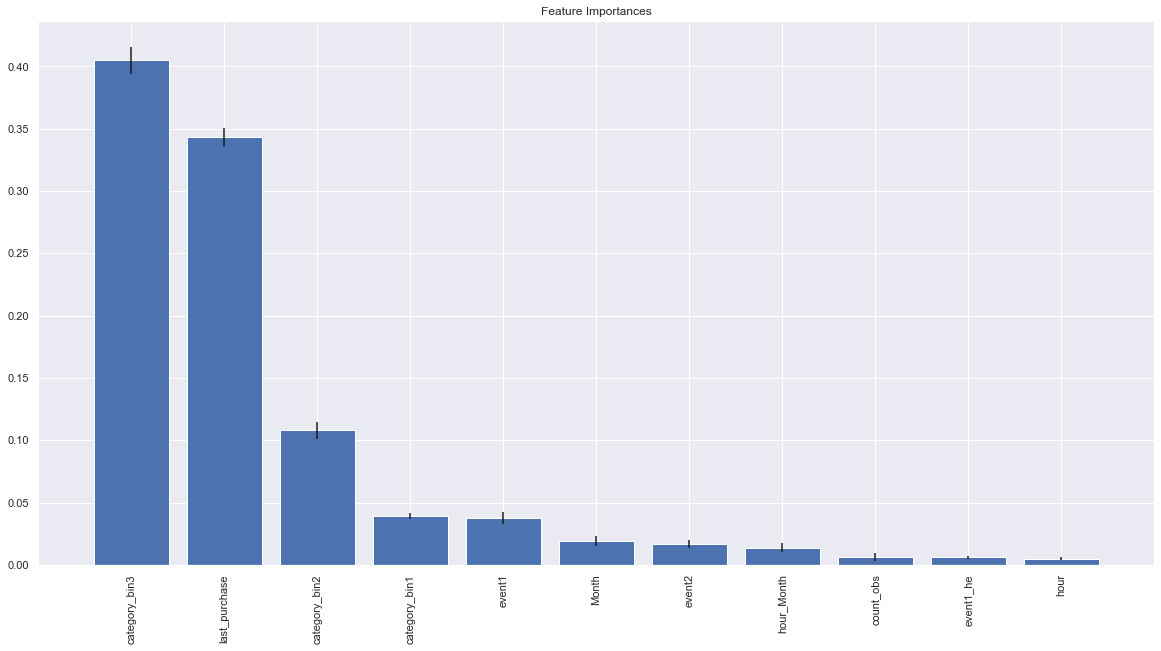

In [906]:
rf11 = RandomForestClassifier()      
rf11 = rf11.fit(X,y)
imp = rcf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf11.estimators_], axis=0)
indices = np.argsort(imp)[::-1]

plt.title("Feature Importances")
plt.bar(range(X.shape[1]), imp[indices], color="b", yerr=std[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

I drop the two features who got the lowest score

In [911]:
full_data12.drop(['hour','event1_he'],axis=1,inplace = True)

# Model design and sampling

In this section I split the data to train and test sets.
With the train set I build the model, and I make validation on the test set.
It's important remember to split the data in same proportions of the labels (stratify parameter)
After I split the data to train and test, I apply over_sampling method to prevent bias because of the not equal proportions. 

In [928]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size =0.3, random_state = 51)

We saw earlier that the labels aren't balanced, therefore I chose to apply over_sampling method, meaning: all labels
get the same number of observations like the largest label - product 2.

In [944]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2))) 
print("Before OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_train == 4)))
print("Before OverSampling, counts of label '5': {}".format(sum(y_train == 5)))
print("Before OverSampling, counts of label '7': {}".format(sum(y_train == 7)))

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res == 5)))
print("After OverSampling, counts of label '7': {}".format(sum(y_train_res == 7)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

C:\Users\jacob\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jacob\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jacob\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jacob\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in ver

Before OverSampling, counts of label '1': 4027
Before OverSampling, counts of label '2': 5717
Before OverSampling, counts of label '3': 3992
Before OverSampling, counts of label '4': 3879
Before OverSampling, counts of label '5': 1340
Before OverSampling, counts of label '7': 2033
After OverSampling, the shape of train_X: (20988, 11)
After OverSampling, the shape of train_y: (20988,) 

After OverSampling, counts of label '1': 5717
After OverSampling, counts of label '2': 5717
After OverSampling, counts of label '3': 5717
After OverSampling, counts of label '4': 5717
After OverSampling, counts of label '5': 5717
After OverSampling, counts of label '7': 5717
After OverSampling, the shape of train_X: (34302, 11)
After OverSampling, the shape of train_y: (34302,) 



Now I'll run 4 Machine learning methods, and I will choose the best method.
The best method is the method that got the highest cv_avreage, and the lowest cv_variance.
For each method I apply cross validation of 10 folds (10 times I run the model, and each time different 10% of the data
used as validation), and print the scores.

In [957]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn1 = cross_val_score(knn, X_train_res, y_train_res, cv=10, scoring='accuracy')
knn_cv_avreage = np.mean(knn1)
knn_cv_variance = np.var(knn1)
print([knn_cv_avreage,knn_cv_variance])

[0.38992167112920867, 0.0014590538713281358]


In [958]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB1 = cross_val_score(NB, X_train_res, y_train_res, cv=10, scoring='accuracy')
NB_cv_avreage = np.mean(NB1)
NB_cv_variance = np.var(NB1)
print([NB_cv_avreage,NB_cv_variance])

[0.24004446680200164, 3.380163847455726e-05]


In [955]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest1 = cross_val_score(forest, X_train_res, y_train_res, cv=10, scoring='accuracy')
forest_cv_avreage = np.mean(forest1)
forest_cv_variance = np.var(forest1)
print([forest_cv_avreage,forest_cv_variance])

[0.4218459288616142, 0.003424222641093183]


In [969]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb1= cross_val_score(gb, X_train_res, y_train_res, cv=10, scoring='accuracy')
gb_cv_avreage = np.mean(gb1)
gb_cv_variance = np.var(gb1)
print([gb_cv_avreage,gb_cv_variance])

[0.34651174805601137, 0.0002647899918775243]


In [968]:
print('KNN method - Avreage and variance are:', [knn_cv_avreage,knn_cv_variance])
print('NB method - Avreage and variance are:' , [NB_cv_avreage,NB_cv_variance])
print('Rf method - Avreage and variance are',[forest_cv_avreage,forest_cv_variance])
print('GB method - Avreage and variance are',[gb_cv_avreage,gb_cv_variance])

KNN method - Avreage and variance are: [0.38992167112920867, 0.0014590538713281358]
NB method - Avreage and variance are: [0.24004446680200164, 3.380163847455726e-05]
Rf method - Avreage and variance are [0.4218459288616142, 0.003424222641093183]
GB method - Avreage and variance are [0.34651174805601137, 0.0002647899918775243]


I choose the Random forest method as my MODEL.
Although this method as the largest standard deviation, it has the best scores

# Model generation and evaluation

In this section I run the random forest again in order to get the scores for the test set

In [1002]:
rf = RandomForestClassifier()

In [1018]:
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1019]:
y_prediction = rf.predict(X_test)

In [1020]:
accuracy_score(y_prediction,y_test)

0.25578034682080925

In [1021]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))
print(accuracy_score(y_test, y_prediction))

[[390 432 235 301 179 189]
 [458 788 347 443 184 231]
 [275 385 439 246 109 257]
 [280 440 253 432 141 116]
 [130  96  74  95 126  54]
 [146 194 214 107  84 126]]
              precision    recall  f1-score   support

           1       0.23      0.23      0.23      1726
           2       0.34      0.32      0.33      2451
           3       0.28      0.26      0.27      1711
           4       0.27      0.26      0.26      1662
           5       0.15      0.22      0.18       575
           7       0.13      0.14      0.14       871

    accuracy                           0.26      8996
   macro avg       0.23      0.24      0.23      8996
weighted avg       0.26      0.26      0.26      8996

0.25578034682080925


In [1007]:
cm  = confusion_matrix(y_prediction,y_test)

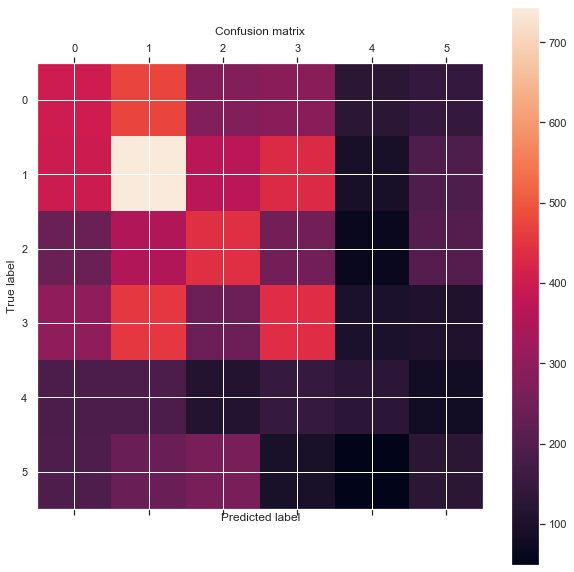

In [1008]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Summary

In this project I was asked to Develop a predictive model based on the provided Order and Online customer behavior data.
After applying the steps I chose Random forest as my model to predict the product category.
In the training step, I got score of 0.42.
In the test step, I got score of 0.25.
It's known that I need to get in the test data lower score than in the train data.
The gap is little high.
(I need to apply more checks if the model suffers from overfitting )

Two more comments:
1. My precision scores arn't so good.
   particularly, I need to find patterns for the features that I didn't use. (product2)

2.From the precision scores in the confusion matrix, it looks that my model was better in the 
  largest labels. It seems that in order to get better result for the smaller labels (5 and 7)
  I need find more unique patterns for them.
